# Lab 2.01 - Australian Athletes (ais)

Lees de AIS dataset in en verzorg alle variabelen van de juiste datatypes indien nodig. Zorg ervoor dat er geen object-variabelen overblijven.

In [1]:
# libraries importeren
import numpy as np
import pandas as pd
import seaborn as sns

# csv-bestand uitlezen
ais = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/ais.csv')

# index zetten op 'id'
ais = ais.set_index('id')

# 'object' omzetten naar categorische variabelen
ais['sex'] = ais['sex'].astype('category')
ais['sport'] = ais['sport'].astype('category')

Plot de volgende variabelen. Gebruik een passend plottype voor de soort variabele.

- `sex`
- `sport`
- `ht` t.o.v. `sex`
- `ht` t.o.v. `sport`

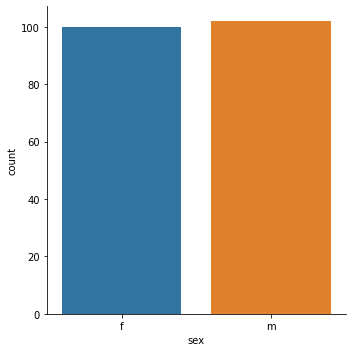

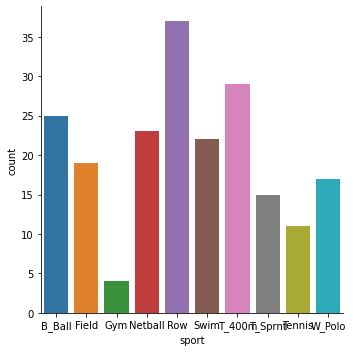

In [2]:
# maak een histogram op basis van sex, hier zijn er twee balken: vrouwelijk/mannelijk
sns.catplot(data=ais, kind="count", x="sex")

# maak een histogram op basis van de sport, hier zijn er tien balken: één voor iedere sport
sns.catplot(data=ais, kind="count", x="sport")

<AxesSubplot:xlabel='ht', ylabel='Density'>

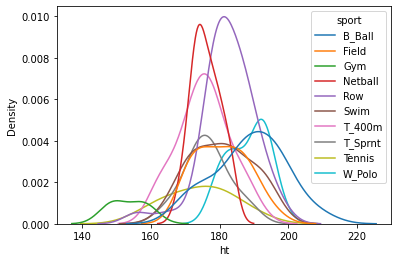

In [3]:
# ht is een kwantitatieve waarde, je kan iets splitsen door gebruik te maken van 'hue=...'
# Onderverdeeld op basis van sport.
sns.kdeplot(data=ais, x='ht', hue='sport')

<AxesSubplot:xlabel='ht', ylabel='Density'>

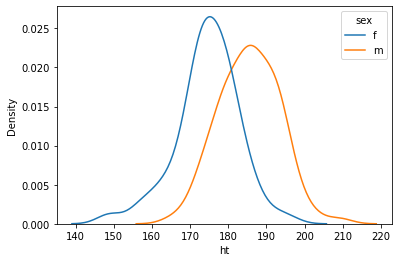

In [4]:
# Onderverdeeld op basis van geslacht.
sns.kdeplot(data=ais, x='ht', hue='sex')

<AxesSubplot:xlabel='ht', ylabel='sport'>

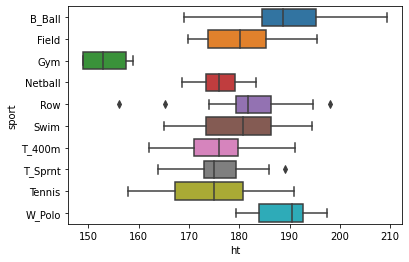

In [17]:
# Boxplot maken op basis van de hoogte gegroepeerd op sport.
sns.boxplot(x='ht', y='sport', data=ais)

<AxesSubplot:xlabel='ht', ylabel='sport'>

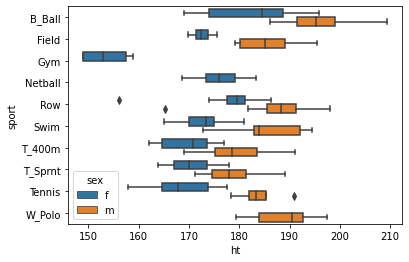

In [21]:
# Boxplot maken van de hoogte. Dit gegroepeerd op sport en geplaatst tegenover geslacht.
sns.boxplot(data=ais, x='ht', y='sport', hue='sex')

Je kan je dataset gaan filteren op basis van bepaalde eigenschappen. Zo kan je bijvoorbeeld enkel de roeiers gaan ophalen door te filteren op `sport == 'Row'`.

Maak aparte datasets van de volgende eigenschappen:

1. Enkel de roeiers
2. Alle roeiers, netbal- en tennisspelers.
3. De vrouwelijke roeiers en basketbalspelers.

In [40]:
# 1. Bereken voor iedere variabele de centrum- en spreidingsmaten van alle roeiers. 
roeiers = ais[ais['sport'] == 'Row']

modus = roeiers.sex.mode()
voorkomens=roeiers['sex'].value_counts()

print(f'Frequentietabel: \n{voorkomens}')
print(f'De modus is: {modus}')
print(f'De kwalitatieve gegevens:\n{roeiers.ht.describe()}')

Frequentietabel: 
f    22
m    15
Name: sex, dtype: int64
De modus is: 0    f
Name: sex, dtype: category
Categories (2, object): ['f', 'm']


In [43]:
# 2. Bereken voor iedere variabele de centrum- en spreidingsmaten van alle roeiers, netballers, en tennissers.
# Drie keuzes -- Gebruik hiervoor een OR-operatie
# Driemaal een query meegeven met ertussen een '|'
rowNetTennis = ais[(ais['sport']  == 'Row') | (ais['sport']  == 'Netball') | (ais['sport']  == 'Tennis')]

modus = rowNetTennis.sex.mode()
voorkomens = rowNetTennis['sex'].value_counts()

print(f'Frequentietabel: \n{voorkomens}')
print(f'De modus is: {modus}')
print(f'De kwalitatieve gegevens:\n{rowNetTennis.ht.describe()}')

Frequentietabel: 
f    52
m    19
Name: sex, dtype: int64
De modus is: 0    f
Name: sex, dtype: category
Categories (2, object): ['f', 'm']
De kwalitatieve gegevens:
count     71.000000
mean     179.066197
std        7.936371
min      156.000000
25%      174.250000
50%      179.500000
75%      183.400000
max      198.000000
Name: ht, dtype: float64


In [44]:
# 3. Bereken voor iedere variabele de centrum- en spreidingsmaten van alle vrouwelijke basketters en roeiers
filterVrouwelijk = ais['sex'] == 'f'
filterSport = (ais['sport'] == 'Row') | (ais['sport'] == 'B_Ball')
vraag3 = ais[filterVrouwelijk & filterSport]

modus = vraag3.sex.mode()
voorkomens = vraag3['sex'].value_counts()

print(f'Frequentietabel: \n{voorkomens}')
print(f'De modus is: {modus}')
print(f'De kwalitatieve gegevens:\n{vraag3.ht.describe()}')

Frequentietabel: 
f    35
m     0
Name: sex, dtype: int64
De modus is: 0    f
Name: sex, dtype: category
Categories (2, object): ['f', 'm']
De kwalitatieve gegevens:
count     35.000000
mean     180.125714
std        7.144078
min      156.000000
25%      177.400000
50%      179.700000
75%      184.650000
max      195.900000
Name: ht, dtype: float64


## Controle

`sex`:

|           | Selection 1 | Selection 2 | Selection 3 |
| :-------- | :---------- | :---------- | :---------- |
| **f**     | 22          | 52          | 35          |
| **m**     | 15          | 19          | 0           |
| **mode**  | f           | f           | f           |

`ht`

| Statistic  | Selection 1 | Selection 2 | Selection 3 |
| :--------- | :---------- | :---------- | :---------- |
| mean       | 182.376     | 179.066     | 180.126     |
| stdev      | 7.798       | 7.936       | 7.144       |
| min        | 156         | 156         | 156         |
| Q1         | 179.3       | 174.25      | 177.4       |
| median     | 181.8       | 179.5       | 179.7       |
| Q3         | 186.3       | 183.4       | 184.65      |
| max        | 198         | 198         | 195.9       |
| IQR        | 7           | 9.15        | 7.250       |